NAME: Awodaisi Adeyanju
STUDENT ID: 10029592
Module Title :Information Retrieval
Module Code: 7071CEM
Assignment Title: To Develop a vertical search engine


In [1]:
## importing a libraries need for the construction of the vertical search engines 
import pandas as pd
import numpy as np
import requests
import re
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint

#To creat the profile for the each of the persons
profile=[ ]

feed = requests.get('https://pureportal.coventry.ac.uk/en/organisations/coventry-university/persons/')
source= feed.text
soup= BeautifulSoup(source, 'html.parser')

for item in soup.find_all("h3", class_= 'title'):
    tag= item.find('a')
    link= tag.attrs['href']

    profile.append(link)
    
    
    
#To spool all link in the each profile
Publication=[]

for url in profile:
    
    profile_page = requests.get(url)
    html = profile_page.text
    soup = BeautifulSoup(html, "html.parser")
    #time.sleep(2)
    for main in soup.find_all('h3', class_ ='title'): 
        newpage= main.find('a')
        url= newpage['href']
        if 'https://pureportal.coventry.ac.uk/en/publications/' not in url:
          continue
       
        Publication.append(url)

In [2]:
       
# Extracting the title, author, abstract and link to paper for each of the staff's publication
Publications= []
Authors= []
Links= []


for item2 in Publication:
    content = requests.get(item2)
    html = content.text
    soup1 = BeautifulSoup(html, "html.parser")


# To extract title for each of the publication
    for i in soup1.findAll('div', class_= 'row'):
        div_book= i.findChild('div', class_= 'rendering')
        book = div_book.find('h1')
        Publications.append(book.text)

      

# To spool all Authors per publication 
    for i in soup1.findAll('p', class_= 'relations persons'):
        author= i.findChild('span').text
        Authors.append(author)

In [3]:
# creating a dataframe called profile_table that containing all crawled information
profile_table= pd.DataFrame({
'Publications': Publications,
'Author': Authors,
'Links': Publication
})


profile_table

,Publications,Author,Links
0,Enhancing CO2 solubility in the aquifer with t...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...
1,Investigating the Impact of Temperature on Rel...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...
2,The influence of temperature on wettability al...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...
3,Accelerating CO2 Solubility in Brine With Low ...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...
4,Investigating The Impact Of Relative Permeabil...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...
...,...,...,...
104,Investigating the Effect of Mass Variation for...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...
105,A new method towards achieving FES-induced mov...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...
106,Restoration of Movement using FES: An Introduc...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...
107,Kinematic modelling of FES induced sit-to-stan...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...


In [4]:
#To insert a new column called ID into the dataframe
profile_table['ID'] = [x for x in range(1, len(profile_table.values)+1)]


profile_table

,Publications,Author,Links,ID
0,Enhancing CO2 solubility in the aquifer with t...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,Investigating the Impact of Temperature on Rel...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,The influence of temperature on wettability al...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,Accelerating CO2 Solubility in Brine With Low ...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,Investigating The Impact Of Relative Permeabil...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
...,...,...,...,...
104,Investigating the Effect of Mass Variation for...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,105
105,A new method towards achieving FES-induced mov...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,106
106,Restoration of Movement using FES: An Introduc...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,107
107,Kinematic modelling of FES induced sit-to-stan...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,108


In [5]:
profile_table

,Publications,Author,Links,ID
0,Enhancing CO2 solubility in the aquifer with t...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,Investigating the Impact of Temperature on Rel...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,The influence of temperature on wettability al...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,Accelerating CO2 Solubility in Brine With Low ...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,Investigating The Impact Of Relative Permeabil...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
...,...,...,...,...
104,Investigating the Effect of Mass Variation for...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,105
105,A new method towards achieving FES-induced mov...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,106
106,Restoration of Movement using FES: An Introduc...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,107
107,Kinematic modelling of FES induced sit-to-stan...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,108


In [6]:
#To convert profile_table CSV file
Book1= profile_table.to_csv('profile_table.csv')


Book1= pd.read_csv ('profile_table.csv')

Book1

,Unnamed: 0,Publications,Author,Links,ID
0,0,Enhancing CO2 solubility in the aquifer with t...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,1,Investigating the Impact of Temperature on Rel...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,2,The influence of temperature on wettability al...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,3,Accelerating CO2 Solubility in Brine With Low ...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,4,Investigating The Impact Of Relative Permeabil...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
...,...,...,...,...,...
104,104,Investigating the Effect of Mass Variation for...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,105
105,105,A new method towards achieving FES-induced mov...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,106
106,106,Restoration of Movement using FES: An Introduc...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,107
107,107,Kinematic modelling of FES induced sit-to-stan...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,108


In [7]:
Book1= Book1.drop('Unnamed: 0', 1) # To delete unnamed columns

Book1

,Publications,Author,Links,ID
0,Enhancing CO2 solubility in the aquifer with t...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,Investigating the Impact of Temperature on Rel...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,The influence of temperature on wettability al...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,Accelerating CO2 Solubility in Brine With Low ...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,Investigating The Impact Of Relative Permeabil...,Mohsen Abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
...,...,...,...,...
104,Investigating the Effect of Mass Variation for...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,105
105,A new method towards achieving FES-induced mov...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,106
106,Restoration of Movement using FES: An Introduc...,M. Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,107
107,Kinematic modelling of FES induced sit-to-stan...,Mohammed Ahmed,https://pureportal.coventry.ac.uk/en/publicati...,108


INDEXING Of The Crawled Informations

In [8]:
#To index the Crawled Information (Book1)
#importing Libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
import string

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\FelixAdeyanju\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FelixAdeyanju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FelixAdeyanju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FelixAdeyanju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
single_entry = Book1.loc[0,:].copy() #To retrieve the first row and copy it into the variable called single_entry
single_entry

Publications    Enhancing CO2 solubility in the aquifer with t...
Author                                          Mohsen Abbaszadeh
Links           https://pureportal.coventry.ac.uk/en/publicati...
ID                                                              1
Name: 0, dtype: object

In [10]:
#To perfomr the Data cleaning of the retrieved information
# To convert all the words to lower case and remove all puntunation marks 
def process_string(text):
  text = text.lower() #to lowercase
  text = text.translate(str.maketrans('', '', string.punctuation)) #strip punctuation
  return text

In [11]:
# Lemmatize with POS Tag. This help to return a tuple of different part of speech. 
# this also help  to map NLTK's POS tags to the format wordnet lemmatizer would accept.
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



# Example: to check if the function created are working
print("were: {}\n Run: {}\n Awodaisi: {}" .format(get_wordnet_pos("were"), get_wordnet_pos("run"), get_wordnet_pos("Awodaisi")))

were: v
 Run: v
 Awodaisi: n


In [12]:
# To remove all words with no or low significant
stop = stopwords.words('english') 

In [13]:
# this is design to eradicate words of low significant 
# by iterating over all words in text, lemmatizing it to return 
#the transformed string

lem = WordNetLemmatizer()

def stop_lemmatize(doc):
    tokens = nltk.word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in stop:
            tmp += lem.lemmatize(w, get_wordnet_pos(w)) + " "
    return tmp

In [14]:
#To retrieve single entry for Publications 
stop_lemmatize(doc = single_entry.Publications)

'Enhancing CO2 solubility aquifer use downhole cooler tool '

In [15]:
# To convert words in documents to lower case and remove all puntunation marks
def process_string(text):
  text = text.lower() #to lowercase
  text = text.translate(str.maketrans('', '', string.punctuation)) #strip punctuation
  text = stop_lemmatize(text)
  return text

In [16]:
# check time used to process paper and 
#notice the output are all in lower case after the function is being applied.
%time process_string(single_entry.Publications)

Wall time: 36.9 ms


'enhance co2 solubility aquifer use downhole cooler tool '

In [17]:
#To process for the retrieved 
#applying string processed function created to all the information retrieved(book) and copy them to Book1.
book_processed = Book1.copy()

In [18]:
# This transform all the columns in the Book1 to lower case to ease retrieval 
def transform_df(df):
  df['Author'] = df['Author'].apply(process_string)
  df['Publications'] = df['Publications'].apply(process_string)

In [19]:
#time spent to run this function on the processed book
%time transform_df(book_processed)

Wall time: 3.12 s


In [20]:
#return information of the first 10 documents in the Book1
book_processed.head(10)

,Publications,Author,Links,ID
0,enhance co2 solubility aquifer use downhole co...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,investigate impact temperature relative permea...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,influence temperature wettability alteration c...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,accelerate co2 solubility brine low temperatur...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,investigate impact relative permeability curve...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
5,crosslayer multipath multichannel mac protocol...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,6
6,performance evaluation receiver direct transmi...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,7
7,reliable multipath multichannel route migratio...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,8
8,resist blackhole attack manet,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,9
9,dynamic source rout attack,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,10


BUILDING INVERTED INDEX FOR Book1 (Retrieved Information)

In [21]:
#combining all columns together and delete each of the columns, except ID
book_processed['text'] = book_processed["Publications"] + " " + book_processed["Author"]
drop_cols = ["Author","Publications", "Links"]
book_processed= book_processed.drop(drop_cols, axis=1)

In [22]:
book_processed.dtypes

ID       int64
text    object
dtype: object

In [23]:
#adding to the tranform processed dataframe function for better retrieval of information

def transform_df(df):
  df = df
  df['Author'] = df['Author'].apply(process_string)
  df['Publications'] = df['Publications'].apply(process_string)
  df['text'] = df['Author'] + " " + df['Publications']
  drop_cols = ['Author', 'Publications', 'Links']
  df = df.drop(drop_cols, axis=1)
  return df

In [24]:
# To retrieve information from Book using (loc) know as Label Indexing
#label indexing 

single_entry = book_processed.loc[0,:].copy() # retrieve the information from the first row and copy it to single_entry
print(single_entry)
index_test = {}

ID                                                      1
text    enhance co2 solubility aquifer use downhole co...
Name: 0, dtype: object


In [25]:
#Spliting text in the text dictionary to create the posting list using the ID created in the book.  
# Then place into a separate dictionaries.

words = single_entry.text.split()
ID = single_entry.ID

In [26]:
#creating the inverted index with their respective posting list(ID)
word = words[0]
sample = {word: [ID]}
print(sample)

{'enhance': [1]}


In [27]:
# To loop and append entry ID to the postings 
for word in words:
  if word in index_test.keys():
    if ID not in index_test[word]:
      index_test[word].append(ID)
  else:
    index_test[word] = [ID]
    
    

#To add the posting list (ID), to each element, in each role.
print(index_test)

{'enhance': [1], 'co2': [1], 'solubility': [1], 'aquifer': [1], 'use': [1], 'downhole': [1], 'cooler': [1], 'tool': [1], 'mohsen': [1], 'abbaszadeh': [1]}


In [28]:
# configuring the posting list (ID) to each of the data in the dataframe(book)
# configuring the posting list (ID) to each of the data in the dataframe(book)
def index_it(single_entry, index):
  words = single_entry.text.split()
  ID = single_entry.ID
  for word in words:
    if word in index.keys():
      if ID not in index[word]:
        index[word].append(ID)
    else:
      index[word] = [ID]
  return index

In [29]:
#calling the function created for all data in the dataframe(book)
inverted_index = index_it(single_entry=single_entry, index= {})
print(inverted_index)

{'enhance': [1], 'co2': [1], 'solubility': [1], 'aquifer': [1], 'use': [1], 'downhole': [1], 'cooler': [1], 'tool': [1], 'mohsen': [1], 'abbaszadeh': [1]}


In [30]:
#preforming the function in the inverted_
def index_all(df, index):
  for i in range(len(df)):
    single_entry = df.loc[i,:]
    index = index_it(single_entry = single_entry, index = index)
  return index

In [31]:
index = index_all(book_processed, index = {})
len(index)

730

In [32]:
# combining all the functions together to form an entry
def build_index(df, index):
    to_add = transform_df(df)
    index = index_all(df = to_add, index = index)
    return index

In [33]:
idx = build_index(df = Book1, index = {})

In [34]:

len(idx)

730

PERFORMING THE RANKING

Index Ranking to relevant words for ease of Retrieval

In [35]:
#Loading the appropriate Libary 
import gensim
import numpy as np

c:\users\felixadeyanju\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [36]:
#loading the pretrained model which contained the word2vec to be used for ranking
word2vec = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/FelixAdeyanju/Desktop/IR/GoogleNews-vectors-negative300.bin', binary=True)

In [37]:
#get the words from the dataframe and average of the vector
print(words)

['enhance', 'co2', 'solubility', 'aquifer', 'use', 'downhole', 'cooler', 'tool', 'mohsen', 'abbaszadeh']


In [38]:
def average_vectors(word2vec_model, doc):
   
    doc = [word for word in doc if word in word2vec_model.key_to_index] #remove out-of-vocabulary words
    if len(doc) == 0:
      return np.zeros(300)
    else:
      return np.mean(word2vec_model[doc], axis=0)

In [39]:
%time test_vec = average_vectors(word2vec, words)

Wall time: 2.99 ms


In [40]:
def prepare_ranking(df):
  corpus = df[['ID', 'text']].copy()
  doc_vecs = {}
  for i in range(len(corpus)):
    row = corpus.loc[i,:]
    text = row.text.split()
    doc_vecs[row.ID]=average_vectors(word2vec, text)
  doc_vecs = pd.DataFrame.from_dict(data=doc_vecs, orient="index")
  doc_vecs['ID'] = doc_vecs.index
  return doc_vecs

In [41]:
doc_vecs = prepare_ranking(df=Book1)
doc_vecs

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,ID
1,-0.042328,0.030609,-0.001076,-0.068466,-0.167755,0.144440,-0.023532,-0.083717,0.049454,0.131735,...,0.128265,-0.110733,0.133049,-0.105835,0.016251,-0.080515,-0.031891,-0.025040,-0.015503,1
2,-0.100977,0.040027,0.004196,-0.011914,-0.084094,0.041797,-0.002112,-0.179297,0.157617,0.149515,...,0.052332,-0.080170,0.139746,-0.047162,0.027631,-0.032196,0.040588,0.045282,-0.031119,2
3,-0.028890,0.041341,0.019589,-0.085612,-0.136068,0.085342,-0.051649,-0.145725,0.087079,0.106635,...,0.027500,-0.005927,0.083740,0.050178,0.009291,-0.049750,-0.029527,0.033129,0.019121,3
4,-0.008403,0.048299,0.018255,0.037364,-0.144552,0.110420,-0.029093,-0.158222,0.046274,0.095154,...,0.114909,-0.115144,0.162242,-0.048731,0.032461,-0.055182,0.061376,-0.006638,-0.005717,4
5,-0.036819,0.042725,0.002426,-0.057739,-0.086044,0.056458,-0.049622,-0.172363,0.100602,0.200424,...,0.057693,-0.059345,0.084351,-0.069847,0.057594,-0.030342,0.071487,-0.012489,-0.034241,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.004338,0.012797,-0.051287,0.013441,-0.134099,0.058852,0.010208,-0.141296,0.031756,-0.008057,...,0.054417,-0.043743,-0.054622,-0.054504,0.002215,-0.122628,0.019145,-0.008668,0.072307,105
106,0.036997,0.021149,0.054301,0.116516,-0.031759,0.007365,0.041769,-0.122925,-0.039103,0.038981,...,0.057210,-0.046529,-0.058716,-0.155436,-0.028392,0.072889,0.087280,-0.047770,0.094076,106
107,0.058672,0.086365,-0.038435,0.084734,0.058515,0.054199,0.076050,-0.171805,0.090036,0.040048,...,-0.076625,0.024414,-0.019601,0.002232,-0.058036,0.016427,-0.085920,0.006435,0.053964,107
108,0.074074,0.102702,-0.038498,0.087082,-0.050896,0.052574,0.032181,-0.128677,-0.004730,0.033905,...,0.114761,-0.046204,-0.020630,-0.073792,0.053223,-0.029714,-0.023163,-0.053497,0.123146,108


Query Processor

To be able to querie the 

In [42]:
sample= "Mohamed Abdelshafy"

In [43]:
print("User query: {}." .format(sample))
test_norm = process_string(sample)
print("Normalized query: {}." .format(test_norm))

User query: Mohamed Abdelshafy.
Normalized query: mohamed abdelshafy .


In [44]:
#this is where the splitting of the sample take place
test_split = test_norm.split()

In [45]:
#converting the sample_split into function

def process_query(query):
  norm = process_string(query)
  return norm.split()

In [46]:
#Retrieving Information from Index, check if they are in the index vocabulary and associate with the posting list

retrieved = []
for word in test_split:
    if word in index.keys():
        retrieved.append(index[word])

In [47]:
#looking for the intersection of all posting
#looking for the intersection of all posting list
def lists_intersection(lists):
    intersect = list(set.intersection(*map(set, lists)))
    intersect.sort()
    return intersect

In [48]:
result = lists_intersection(retrieved)
print(result)

[6, 7, 8, 9, 10]


To Write a function using conditional statement

In [49]:
#To write a condiction using conditional statement

def search_googleish(query, index=idx):
  query_split = process_query(query)
  retrieved = []
  for word in query_split:
    if word in index.keys():
      retrieved.append(index[word])
  if len(retrieved)>0:
    result = lists_intersection(retrieved)
  else:
      result = ['No Information Found']
  return result

In [50]:
result_IDs = search_googleish("solubility brime", index)
print(result_IDs)

[1, 4]


In [51]:
# To retrieve information from the database. 
#This is done by connecting the retrieved IDs with some useful information stored in the database 
#that we first use to refine the results and then to print nice result to user
meta = Book1.drop(['text'], axis=1).copy()
meta.head(10)

,Publications,Author,Links,ID
0,enhance co2 solubility aquifer use downhole co...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,investigate impact temperature relative permea...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,2
2,influence temperature wettability alteration c...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,3
3,accelerate co2 solubility brine low temperatur...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4
4,investigate impact relative permeability curve...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,5
5,crosslayer multipath multichannel mac protocol...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,6
6,performance evaluation receiver direct transmi...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,7
7,reliable multipath multichannel route migratio...,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,8
8,resist blackhole attack manet,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,9
9,dynamic source rout attack,mohamed abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,10


In [52]:
# To get the rows of retrieved IDs from the database
def connect_id_df(retrieved_id, df):
    return df[df.ID.isin(retrieved_id)].reset_index(drop=True)

In [53]:
# To return the rows of the retrieved query from the above
result_meta = connect_id_df(result_IDs, meta)
result_meta.head(10)

,Publications,Author,Links,ID
0,enhance co2 solubility aquifer use downhole co...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1
1,accelerate co2 solubility brine low temperatur...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4


To Rank the the ouput of Retrieved query.
We need to compute the vector for the query using the cosine similarity 
This will help to compare query to retrieved document relevance

In [54]:
#compute vector for query
query_vec = average_vectors(word2vec, test_split)

In [55]:
# To Retrieve vectors of retrieved documents
result_vecs = connect_id_df(result_IDs, doc_vecs)

In [56]:
#To compute cosine simliarity between retrieved documents and queries
def cos_similarity(a, b):
  dot = np.dot(a, b)
  norma = np.linalg.norm(a)
  normb = np.linalg.norm(b)
  cos = dot / (norma * normb)
  return(cos)

In [57]:
cos_sim = []
for i in range(len(result_vecs)):
  doc_vec = result_vecs.loc[i,:].drop(['ID'])
  cos_sim.append(cos_similarity(doc_vec, query_vec))
result_meta['rank'] = cos_sim

In [58]:
#To sort the retrieved documents by cosine similarity based on their relevance
result_meta.sort_values('rank', axis=0)

,Publications,Author,Links,ID,rank
0,enhance co2 solubility aquifer use downhole co...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,1,0.044785
1,accelerate co2 solubility brine low temperatur...,mohsen abbaszadeh,https://pureportal.coventry.ac.uk/en/publicati...,4,0.045522


In [59]:
#To combine query processor, the index comparism and their relevance into a function. 
#To return value
def rank_results(query, results):
  query_norm = process_query(query)
  query_vec = average_vectors(word2vec, query_norm)
  result_vecs = connect_id_df(results.ID, doc_vecs)
  cos_sim = []
  for i in range(len(result_vecs)):
    doc_vec = result_vecs.loc[i,:].drop(['ID'])
    cos_sim.append(cos_similarity(doc_vec, query_vec))
  results['rank'] = cos_sim
  results = results.sort_values('rank', axis=0)
  return results

In [60]:
outcome = rank_results("co2 solubility", result_meta)

In [61]:
#printing results for user

def print_results(result_df):
  for i in range(len(result_df)):
    res = result_df.loc[i, :]
    print(res.paper)
    print(res.author)
    if i == len(result_df):
        print(res.pagelink)
    else:
        print("{}\n" .format(res.pagelink))

In [62]:
#printing results for user

def print_results(result_df):
  for i in range(len(result_df)):
    res = result_df.loc[i, :]
    print(res.Publications)
    print(res.Author)
    if i == len(result_df):
        print(res.Link)
    else:
        print("{}\n" .format(res.Links))

In [63]:
#print the query
print_results(outcome)

enhance co2 solubility aquifer use downhole cooler tool 
mohsen abbaszadeh 
https://pureportal.coventry.ac.uk/en/publications/enhancing-co2-solubility-in-the-aquifer-with-the-use-of-a-downhol

accelerate co2 solubility brine low temperature injection scenario use downhole cool tool 
mohsen abbaszadeh 
https://pureportal.coventry.ac.uk/en/publications/accelerating-co2-solubility-in-brine-with-low-temperature-injecti



In [64]:
# putting all results together
def search(query, dat=None):
  result = search_googleish(query)
  result = connect_id_df(result, meta)
  result = rank_results(query, result)
  print_results(result)

In [97]:
#To craete a box for user to input queries into the search engines
query = input("Performance evaluation:")
search(query)

Performance evaluation:Performance evaluation
performance evaluation receiver direct transmission protocol single transceiver manet 
mohamed abdelshafy 
https://pureportal.coventry.ac.uk/en/publications/performance-evaluation-of-receiver-directed-transmission-protocol

evaluation merger premium firm performance europe 
daniel aghanya 
https://pureportal.coventry.ac.uk/en/publications/evaluation-of-merger-premium-and-firm-performance-in-europe



Topic Classification Using BBC News article

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting graphs
import sklearn
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [69]:
#Loading of Dataset
df = pd.read_csv("C:\\Users\\FelixAdeyanju\\desktop\\bbc_Dataset\\BBC_Dataset.csv")

In [70]:
## To List first 5 entries in dataframe 
# and review the various colums in the dataframe
df.head()


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [71]:
# To Associate Category names with numerical index 
df['category_id'] = df['Category'].factorize()[0]

#To check first 5 entries of category_id for accuracy
df['category_id'][0:5]

0    0
1    0
2    0
3    1
4    0
Name: category_id, dtype: int64

In [72]:
# To create a new dataframe "category", with unique Categories
# Sorting this list in order of category_id values
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [73]:
# To create a dictionary that can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [74]:
#to bring the new data
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [75]:
# Pick 5 random samples from the dataframe
df.sample(5, random_state=0)

,ArticleId,Text,Category,category_id
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


In [76]:
# Group the dataframe by categories 
#Count items ( number of news articles) in each category
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

<AxesSubplot:xlabel='Category'>

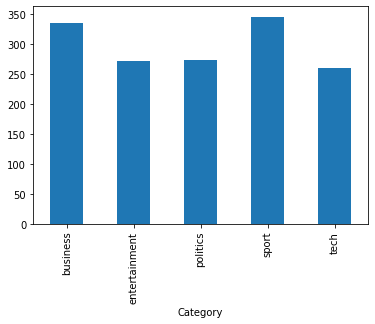

In [77]:
#To check the distribution of bbc news-articles by category

df.groupby('Category').category_id.count().plot.bar(ylim=0)

onvert words in the news articles into numerical features using tfdif

We need to remaps the words in the 1490 articles in the text column of data frame into features with an importance assigned based on each words frequency in the document and across documents

In [78]:
# Remaps the words in the 1490 articles and convert df tosuperset of words based frequency 

from sklearn.feature_extraction.text import TfidfVectorizer #To importT

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray() 

labels = df.category_id  # represents the category of each of the 1490 articles

In [79]:
#Get a feel of the features identified by tfidf
features.shape 

(1490, 9927)

In [80]:
#Checking the dictionary created 
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [81]:
# To Converts the dictionary items into a sorted list. 
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

To Use chi-square analysis to find corelation between features and labels of news category

Do chi2 analyses of all items in this category and Sorts the indices of features_chi2[0] - the chi-squared stats of each feature

Converts indices to feature names ( in increasing order of chi-squared stat values)
List of single word features ( in increasing order of chi-squared stat values)
List for two-word features ( in increasing order of chi-squared t values)
Print 3 unigrams with highest Chi squared stat
Print 3 bigrams with highest Chi squared stat

In [82]:
# To Use chi-square analysis to find corelation between features and labels of news category

from sklearn.feature_selection import chi2

#To look for top 3 categories

N = 3 

#To find find words that are highly corelated to each category
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                  
  indices = np.argsort(features_chi2[0])                                  
  feature_names = np.array(tfidf.get_feature_names())[indices]            
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) 
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) 


# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


In [83]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [84]:
#To import TSNE for 
from sklearn.manifold import TSNE

In [85]:
# To sample a subset of the dataset to reduce t-SNE running time
# To randomly 30% of the dataset
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False) 
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False) 

projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [86]:
type(projected_features)

numpy.ndarray

In [87]:
#To select a category ID
my_id = 0 
projected_features[(labels[indices] == my_id).values]

array([[-17.409828  , -20.436989  ],
       [ -9.56882   , -11.314312  ],
       [-17.156994  ,  -6.452465  ],
       [-10.862223  , -21.660397  ],
       [-19.501608  ,   4.6090965 ],
       [-11.990335  , -16.382895  ],
       [-27.134926  ,  -2.8496113 ],
       [ -9.668595  , -17.357132  ],
       [  8.465661  ,  -9.051764  ],
       [-19.876314  ,  -9.820042  ],
       [  2.6430216 ,   3.9847393 ],
       [-15.166494  , -10.5767145 ],
       [ 15.052534  , -22.136509  ],
       [-29.180244  , -15.261823  ],
       [-11.231472  , -24.399818  ],
       [-13.417371  , -11.908246  ],
       [ -8.409627  , -11.635613  ],
       [-11.572334  , -18.307085  ],
       [-17.998095  , -14.864076  ],
       [-26.832064  ,  -5.992347  ],
       [ -0.91015923, -20.449903  ],
       [-23.755339  , -14.732829  ],
       [-17.284416  ,  -6.835661  ],
       [-22.186396  , -10.912631  ],
       [-11.207357  , -14.555125  ],
       [-25.065447  , -10.098723  ],
       [-22.816729  , -12.928076  ],
 

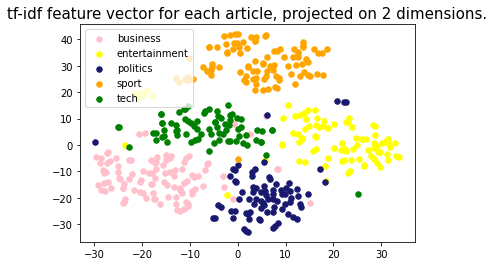

In [88]:
# To find points belonging to each category and plot them

colors = ['pink', 'green', 'midnightblue', 'orange', 'yellow']

for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [89]:
# To load the algorith for the training dataset

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [90]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

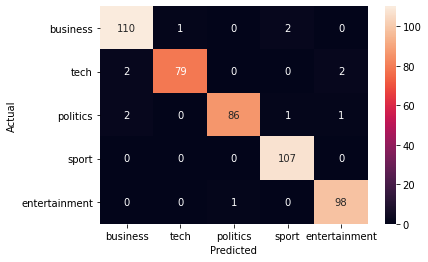

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [92]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [93]:
# model.coef_ contains the importance of each feature for each category
model.coef_

array([[ 0.46799432,  0.01813872, -0.0715333 , ..., -0.03318298,
         0.0068823 , -0.02849203],
       [-0.02957523, -0.04366737, -0.01371468, ...,  0.00362675,
        -0.02877942, -0.02070068],
       [ 0.05006025, -0.05159908, -0.04674601, ..., -0.00638322,
        -0.03112648, -0.02362395],
       [-0.61687406, -0.04152046, -0.05352312, ...,  0.08450437,
         0.08574049,  0.09981232],
       [ 0.12839471,  0.11864819,  0.18551711, ..., -0.04856492,
        -0.03271689, -0.02699566]])

In [94]:
from sklearn.feature_selection import chi2

N = 5
for Category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])   # This time using the model co-eficients / weights
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . firm
       . bank
       . company
       . shares
       . market
  . Top bigrams:
       . chief executive
       . analysts said
       . stock market
       . economic growth
       . oil prices
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . star
       . band
  . Top bigrams:
       . box office
       . los angeles
       . film festival
       . new york
       . big brother
# 'politics':
  . Top unigrams:
       . labour
       . mr
       . party
       . election
       . government
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . match
       . win
       . game
       . coach
       . cup
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . world cup
       . grand slam
# 'tech':
  . Top unigrams:
       . users
       . software
       .

In [98]:
texts= ["Surfside tower collapse: Final victim identified from rubble",
         "Will lockdown change England's new tech habits?",
         "GB's Georgia Taylor-Brown wins silver in women's triathlon as Flora Duffy claims historic gold for Bermuda",
         "House prices at new high as buyers seek more space",
         "A computer key that can unlock the files of hundreds of companies which were hacked in a large-scale cyber-attack has been obtained",
         "Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!" ]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Surfside tower collapse: Final victim identified from rubble"
  - Predicted as: 'sport'

"Will lockdown change England's new tech habits?"
  - Predicted as: 'sport'

"GB's Georgia Taylor-Brown wins silver in women's triathlon as Flora Duffy claims historic gold for Bermuda"
  - Predicted as: 'sport'

"House prices at new high as buyers seek more space"
  - Predicted as: 'business'

"A computer key that can unlock the files of hundreds of companies which were hacked in a large-scale cyber-attack has been obtained"
  - Predicted as: 'tech'

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't 